In [32]:
import tweepy
import pandas as pd
import numpy as np
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import re
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from textblob import TextBlob
import matplotlib.pyplot as plt
factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [33]:
# Memasukkan data dari file CSV
nama_file_csv = 'youtube_bersih.csv'  
df = pd.read_csv(nama_file_csv)

In [34]:
df.drop_duplicates(keep="first", inplace=True)
df

,Unnamed: 0,text_bersih
0,0,Это видео мне подняло настроение0
1,1,ЭТО ТАК ПРИКОЛЬНО МОНТАЖ СУПЕР УДАЧИ ТЕБК В РО...
2,2,Luar biasa
3,3,promosm
4,4,Untuk nama lengkap pembicarfanya siapa ya
...,...,...
97,95,Apakah ada video atau manual book lengkapnya m...
98,96,mohon maaf kak kami tidak menyediakan namun mu...
99,97,Terimakasih sangat bemanfaat Tutorial aetting ...
100,98,Yang saya punya masih A5 hanya 25 user Bagaima...


In [35]:
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import pandas as pd
import numpy as np

# nltk.download('punkt')
# nltk.download('stopwords')

# Inisialisasi stemmer Sastrawi
stemmer = StemmerFactory().create_stemmer()

# Preprocessing
def preprocessing(docText):
    # Periksa apakah nilai NaN
    if pd.isnull(docText):
        return ''

    # Case folding
    text = docText.lower()

    # Bersihkan Teks
    text = re.sub(r"@[\w]*", "", text)
    text = re.sub(r'http\S+', '', text)
    text = re.sub("rt", "", text)
    text = re.sub("yg", "", text)
    text = text.strip()

    # Tokenisasi
    tokens = word_tokenize(text)

    # Stop Words
    stopWord = set(stopwords.words('indonesian'))
    listWords = []
    for t in tokens:
        if t not in stopWord:
            listWords.append(t)

    # Stemming
    listWordAfterStemp = []
    for te in listWords:
        stemmingText = stemmer.stem(te)
        deleteExceptString = re.sub(r"[^a-z]", "", stemmingText)
        listWordAfterStemp.append(deleteExceptString)

    dataListWords = ' '.join(listWordAfterStemp)
    return dataListWords

# Impor data dari file CSV
nama_file_csv = 'youtube_bersih.csv'  # Ganti dengan nama file CSV Anda
df = pd.read_csv(nama_file_csv)

# Pastikan kolom 'text_bersih' ada dalam DataFrame
if 'text_bersih' in df.columns:
    # Terapkan fungsi preprocessing ke kolom 'text_bersih'
    df['preprocessing_result'] = df['text_bersih'].apply(preprocessing)

    # Tampilkan DataFrame
    print(df)
else:
    print("Kolom 'text_bersih' tidak ditemukan dalam DataFrame.")


    Unnamed: 0                                        text_bersih  \
0            0                 Это видео мне подняло  настроение0   
1            1  ЭТО ТАК ПРИКОЛЬНО МОНТАЖ СУПЕР УДАЧИ ТЕБК В РО...   
2            2                                        Luar biasa    
3            3                                            promosm   
4            4          Untuk nama lengkap pembicarfanya siapa ya   
..         ...                                                ...   
97          95  Apakah ada video atau manual book lengkapnya m...   
98          96  mohon maaf kak kami tidak menyediakan namun mu...   
99          97  Terimakasih sangat bemanfaat Tutorial aetting ...   
100         98  Yang saya punya masih A5 hanya 25 user Bagaima...   
101         99  yg mempelajari ini saat darurat covid19 mana j...   

                                  preprocessing_result  
0                                                       
1                                                       


In [36]:
df.sort_values("preprocessing_result", inplace=True)
df

,Unnamed: 0,text_bersih,preprocessing_result
2,2,Luar biasa,
80,"Makasih""",NaN,
79,Kalo kasusnya mau dipasang di sebuah perusahaa...,NaN,
78,"78,""Hallo Mas saya bingung untuk price power B...",NaN,
0,0,Это видео мне подняло настроение0,
...,...,...,...
86,84,apakah windows edu nyaman di pakai juga untuk ...,windows edu nyaman pakai aktivitas kantor beda...
73,73,Ya elah udah nungguin lama ternyata gak d ajar...,ya elah udah nungguin gak d ajarin bikin tampi...
46,46,Yaampun udah 6 tahun ngeyoutube masih aja sepi,yaampun udah ngeyoutube aja sepi
45,45,Yaampun udah 6 tahun ngeyoutube masih aja srpi,yaampun udah ngeyoutube aja srpi


In [37]:
def getPolarity(text):
    analysis = TextBlob(text)
    try:
        analysis = analysis.translate(to="en")
    except Exception as e:
        print(e)
        
    return analysis.sentiment.polarity

df['polarity'] = df['preprocessing_result'].apply(getPolarity)
df

'list' object has no attribute 'strip'
'list' object has no attribute 'strip'
'list' object has no attribute 'strip'
'list' object has no attribute 'strip'
'list' object has no attribute 'strip'
'list' object has no attribute 'strip'
'list' object has no attribute 'strip'
'list' object has no attribute 'strip'
'list' object has no attribute 'strip'
'list' object has no attribute 'strip'
'list' object has no attribute 'strip'
'list' object has no attribute 'strip'
'list' object has no attribute 'strip'
'list' object has no attribute 'strip'
'list' object has no attribute 'strip'
'list' object has no attribute 'strip'
'list' object has no attribute 'strip'
'list' object has no attribute 'strip'
'list' object has no attribute 'strip'
'list' object has no attribute 'strip'
'list' object has no attribute 'strip'
'list' object has no attribute 'strip'
'list' object has no attribute 'strip'
'list' object has no attribute 'strip'
'list' object has no attribute 'strip'
'list' object has no attr

,Unnamed: 0,text_bersih,preprocessing_result,polarity
2,2,Luar biasa,,0.0
80,"Makasih""",NaN,,0.0
79,Kalo kasusnya mau dipasang di sebuah perusahaa...,NaN,,0.0
78,"78,""Hallo Mas saya bingung untuk price power B...",NaN,,0.0
0,0,Это видео мне подняло настроение0,,0.0
...,...,...,...,...
86,84,apakah windows edu nyaman di pakai juga untuk ...,windows edu nyaman pakai aktivitas kantor beda...,0.8
73,73,Ya elah udah nungguin lama ternyata gak d ajar...,ya elah udah nungguin gak d ajarin bikin tampi...,0.0
46,46,Yaampun udah 6 tahun ngeyoutube masih aja sepi,yaampun udah ngeyoutube aja sepi,0.0
45,45,Yaampun udah 6 tahun ngeyoutube masih aja srpi,yaampun udah ngeyoutube aja srpi,0.0


In [38]:
def getSubjectivity(text):
    analysis = TextBlob(text)
    try:
        analysis = analysis.translate(to="en")
    except Exception as e:
        print(e)
        
    return analysis.sentiment.subjectivity

df['subjectivity'] = df['preprocessing_result'].apply(getSubjectivity)
df

'list' object has no attribute 'strip'
'list' object has no attribute 'strip'
'list' object has no attribute 'strip'
'list' object has no attribute 'strip'
'list' object has no attribute 'strip'
'list' object has no attribute 'strip'
'list' object has no attribute 'strip'
'list' object has no attribute 'strip'
'list' object has no attribute 'strip'
'list' object has no attribute 'strip'
'list' object has no attribute 'strip'
'list' object has no attribute 'strip'
'list' object has no attribute 'strip'
'list' object has no attribute 'strip'
'list' object has no attribute 'strip'
'list' object has no attribute 'strip'
'list' object has no attribute 'strip'
'list' object has no attribute 'strip'
'list' object has no attribute 'strip'
'list' object has no attribute 'strip'
'list' object has no attribute 'strip'
'list' object has no attribute 'strip'
'list' object has no attribute 'strip'
'list' object has no attribute 'strip'
'list' object has no attribute 'strip'
'list' object has no attr

,Unnamed: 0,text_bersih,preprocessing_result,polarity,subjectivity
2,2,Luar biasa,,0.0,0.0
80,"Makasih""",NaN,,0.0,0.0
79,Kalo kasusnya mau dipasang di sebuah perusahaa...,NaN,,0.0,0.0
78,"78,""Hallo Mas saya bingung untuk price power B...",NaN,,0.0,0.0
0,0,Это видео мне подняло настроение0,,0.0,0.0
...,...,...,...,...,...
86,84,apakah windows edu nyaman di pakai juga untuk ...,windows edu nyaman pakai aktivitas kantor beda...,0.8,0.4
73,73,Ya elah udah nungguin lama ternyata gak d ajar...,ya elah udah nungguin gak d ajarin bikin tampi...,0.0,0.0
46,46,Yaampun udah 6 tahun ngeyoutube masih aja sepi,yaampun udah ngeyoutube aja sepi,0.0,0.0
45,45,Yaampun udah 6 tahun ngeyoutube masih aja srpi,yaampun udah ngeyoutube aja srpi,0.0,0.0


In [39]:
def getClassification(val):
    if val < 0:
        return 'negatif'
    elif val == 0:
        return 'netral'
    else:
        return 'positif'
df['sentimen'] = df['polarity'].apply(getClassification)
df

,Unnamed: 0,text_bersih,preprocessing_result,polarity,subjectivity,sentimen
2,2,Luar biasa,,0.0,0.0,netral
80,"Makasih""",NaN,,0.0,0.0,netral
79,Kalo kasusnya mau dipasang di sebuah perusahaa...,NaN,,0.0,0.0,netral
78,"78,""Hallo Mas saya bingung untuk price power B...",NaN,,0.0,0.0,netral
0,0,Это видео мне подняло настроение0,,0.0,0.0,netral
...,...,...,...,...,...,...
86,84,apakah windows edu nyaman di pakai juga untuk ...,windows edu nyaman pakai aktivitas kantor beda...,0.8,0.4,positif
73,73,Ya elah udah nungguin lama ternyata gak d ajar...,ya elah udah nungguin gak d ajarin bikin tampi...,0.0,0.0,netral
46,46,Yaampun udah 6 tahun ngeyoutube masih aja sepi,yaampun udah ngeyoutube aja sepi,0.0,0.0,netral
45,45,Yaampun udah 6 tahun ngeyoutube masih aja srpi,yaampun udah ngeyoutube aja srpi,0.0,0.0,netral


In [40]:
positif = df[df["sentimen"] == 'positif']
negatif = df[df["sentimen"] == 'negatif']
netral = df[df["sentimen"] == 'netral']
print("+ " + str((positif.shape[0]/df.shape[0]) * 100 ) + ' %')
print("- " + str((negatif.shape[0]/df.shape[0]) * 100 ) + ' %')
print("~ " + str((netral.shape[0]/df.shape[0]) * 100 ) + ' %')

+ 8.823529411764707 %
- 0.9803921568627451 %
~ 90.19607843137256 %


<BarContainer object of 3 artists>

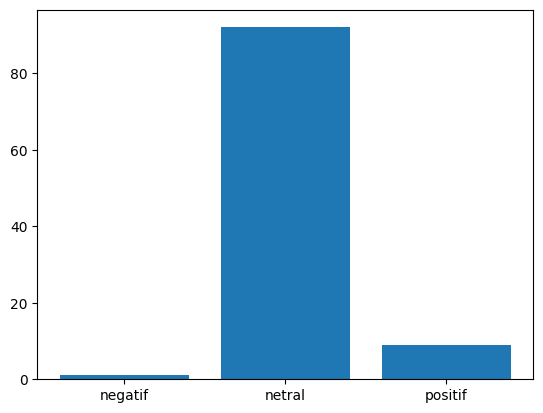

In [41]:
labels = df.groupby('sentimen').count().index.values
values = df.groupby('sentimen').size().values
plt.bar(labels, values)

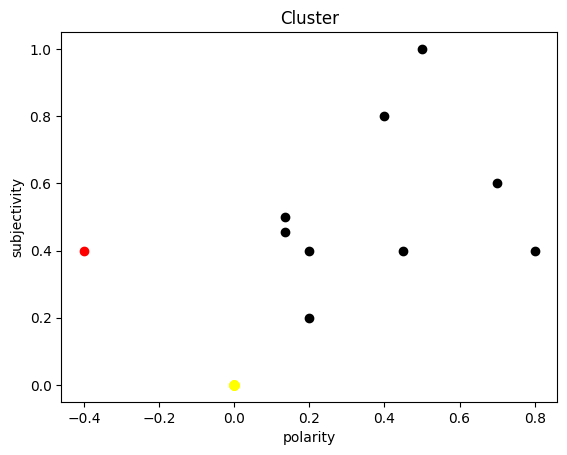

In [42]:
for index, row in df.iterrows():
    if row['sentimen'] == 'positif':
        plt.scatter(row['polarity'], row['subjectivity'], color="black")
    elif row['sentimen'] == 'netral':
        plt.scatter(row['polarity'], row['subjectivity'], color="yellow")
    if row['sentimen'] == 'negatif':
        plt.scatter(row['polarity'], row['subjectivity'], color="red")
    
plt.title('Cluster')
plt.xlabel('polarity')
plt.ylabel('subjectivity')
plt.show()

In [43]:
from sklearn.cluster import KMeans
# import sys
# from matplotlib import style
# style.use("ggplot")

In [44]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [45]:
# Mengasumsikan 'netral' ada dalam kolom 'preprocessing_result'
df['preprocessing_result'] = df['preprocessing_result'].astype(str)

In [46]:
# Gunakan LabelEncoder untuk mengonversi label string menjadi label numerik
label_encoder = LabelEncoder()
df['preprocessing_result'] = label_encoder.fit_transform(df['preprocessing_result'])

In [47]:
# Pilih kolom-kolom yang relevan untuk clustering
selected_columns = ['preprocessing_result']  # Tambahkan kolom lain jika diperlukan

In [48]:
# Standarisasi data
scaler = StandardScaler()
df[selected_columns] = scaler.fit_transform(df[selected_columns])

In [49]:
nCluster = 3

In [50]:
# Fitting KMeans
kmeans = KMeans(n_clusters=nCluster, random_state=42)
df['cluster'] = kmeans.fit_predict(df[selected_columns])

c:\Users\patri\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [51]:
# Tampilkan DataFrame hasil dengan penugasan cluster
print(df[['preprocessing_result', 'cluster']])

    preprocessing_result  cluster
2              -1.635398        1
80             -1.635398        1
79             -1.635398        1
78             -1.635398        1
0              -1.600522        1
..                   ...      ...
86              1.573168        0
73              1.608044        0
46              1.642920        0
45              1.677796        0
87              1.712671        0

[102 rows x 2 columns]


In [52]:
# # Simpan DataFrame ke dalam file CSV
df.to_csv('hasil_clustering_YT.csv', index=False)
